# Desafio: hora da prática

Uma das tarefas passadas pela equipe de supervisão do órgão ambiental era de encontrar a emissão média de cada gás por ano. Conseguimos realizar essa tarefa usando o método groupby() e pivot_table() para gerar uma tabela contendo a emissão ao longo dos anos para cada um dos gases.

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos. Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela, sem utilizar o método groupby.

Você pode buscar informações de como fazer isso na [documentação Pandas sobre o método pivot_table.
](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)


In [48]:
!pip install pandas
!pip install matplotlib
!pip install openpyxl

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
dados = '/content/drive/MyDrive/Planilhas de estudo ALURA/SEEG10-BR_2022.10.27-FINAL.xlsx'

emissoes_gases = pd.read_excel(dados, sheet_name = 'GEE Estados')
emissoes_gases.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


# Pronto, os dados foram devidamente carregados. Agora vamos começar o exercicio!

# Primeiro vamos modificar a tabela pois precisamos que seja possivel ver as emissoes por ano:



In [37]:
# Essa linha de código retorna os nomes das colunas do DataFrame emissoes_gases que estão entre 'Nível 1 - Setor' e 'Produto'.
emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns

Index(['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5',
       'Nível 6', 'Emissão / Remoção / Bunker', 'Gás', 'Estado',
       'Atividade Econômica', 'Produto'],
      dtype='object')

In [38]:
# Retorna uma lista com o nome das colunas listadas que vão de  'Nível 1 - Setor' até 'Produto'.
emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns
colunas_info = list(emissoes_gases.loc[:,'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Emissão / Remoção / Bunker',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [39]:
# Retonara um array com os anos de cada uma das colunas.
emissoes_gases.loc[:,1970:2021].columns

Index([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021],
      dtype='object')

In [40]:
# Retorna uma lista com os anos.
colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [41]:
# Para realizar a transformação do DataFrame, utilizamos o método melt(). Esse método tem o intuito de transformar um DataFrame de um
# formato amplo (wide) para o formato longo (long).

emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissao')

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372219,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
5372220,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
5372221,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
5372222,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [42]:
# Salvando a nova tabela em uma variável para usarmos daqui para frente nas analises :) :

emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano', value_name = 'Emissao')
emissoes_por_ano
# print(emissoes_por_ano)

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372219,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
5372220,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
5372221,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
5372222,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


# E agora sim (aleluia ahaha), temos o 'Ano' e a 'Emissão' e os tipos de gases separados por colunas e estamos prontos para responder a ativida. Sigamos o exercicio..

In [43]:
# Visualizando a tabela de emissoes por ano:
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,Produto,Ano,Emissao
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372219,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,NaN,2021,0.0
5372220,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,NaN,2021,0.0
5372221,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,NaN,2021,0.0
5372222,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,NaN,2021,0.0


In [45]:
# Recapitulando a questão:

# A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor" ao longo dos anos.
# Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela,
# sem utilizar o método groupby.

# Resolvendo a questão:
emissao_setor = emissoes_por_ano.pivot_table(index = 'Ano', columns = 'Nível 1 - Setor', values = 'Emissao', aggfunc = 'mean')
emissao_setor


Nível 1 - Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1970,46246.897891,16144.173809,0.000000,106549.168676,11684.883558
1971,48036.199926,17885.238953,0.000000,111532.507753,12676.706849
1972,50202.891428,19293.468629,0.000000,125701.525455,13709.697850
1973,52065.314764,22056.314835,0.000000,137657.110402,14715.248028
1974,54319.383750,23846.090343,0.000000,149941.779638,15710.616150
1975,59391.923086,25025.762137,0.000000,168471.860169,16667.446706
1976,62248.257994,27196.813347,0.000000,193826.482068,17539.505222
1977,62839.220909,27651.064663,0.000000,231505.609283,18462.455148
1978,62523.059780,29819.997276,0.000000,255736.210711,19327.840165


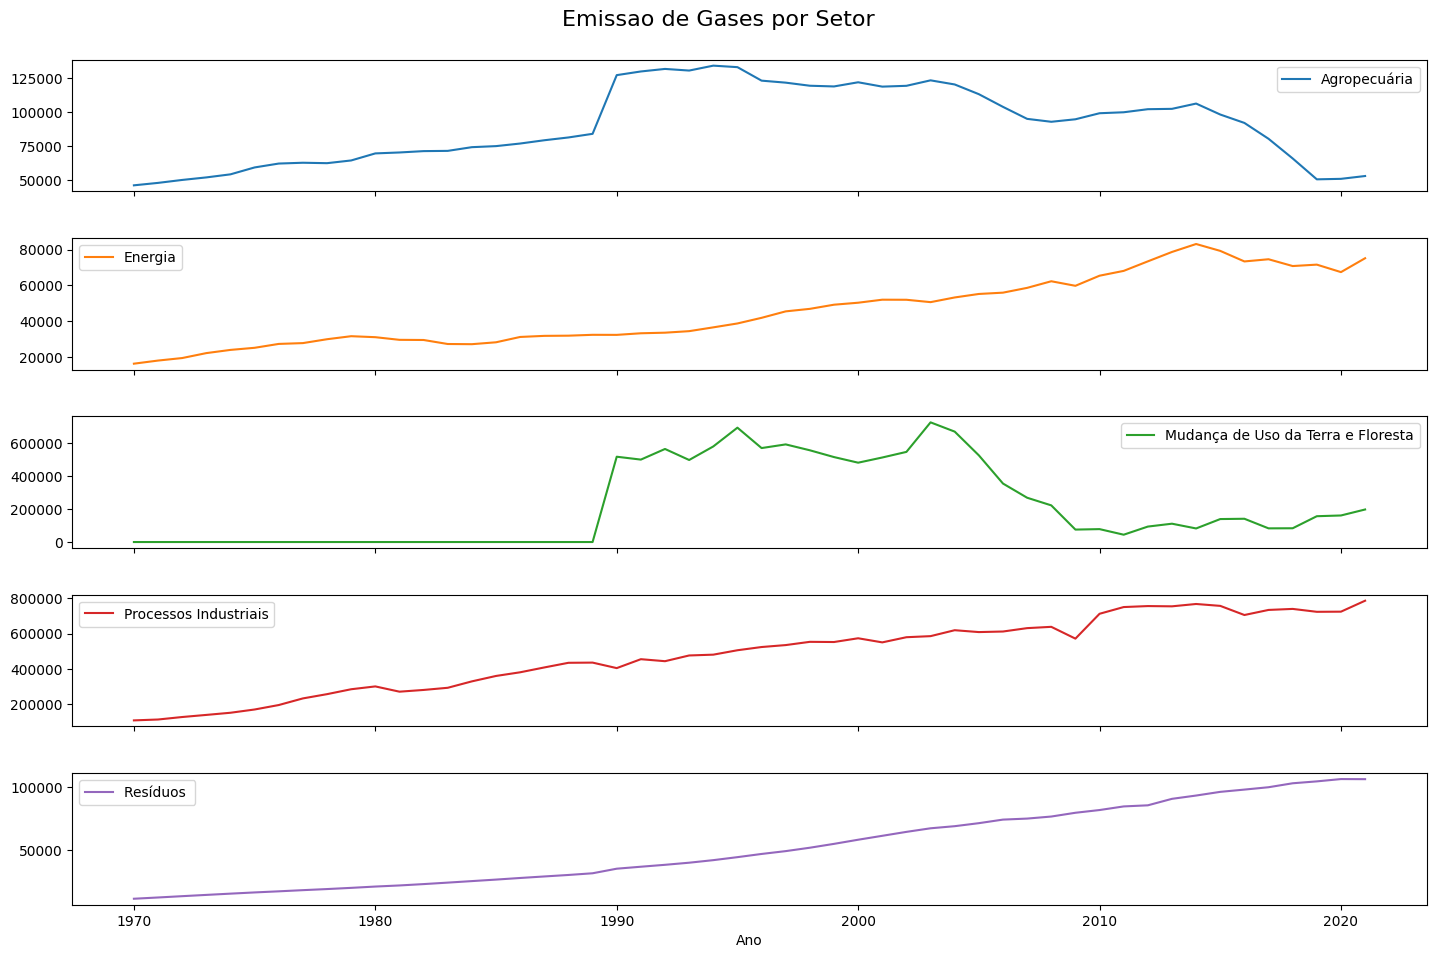

In [66]:
# Plotando o Gráfico e finalizando a atividade!
emissao_setor.plot(subplots=True, figsize=(15, 10))

# Ajustando o layout e adicionando o título geral
plt.tight_layout(pad=3.0)
plt.suptitle('Emissao de Gases por Setor', fontsize=16)
plt.subplots_adjust(top=0.93)  # Ajusta a posição do suptitle

# Mostrando o gráfico
plt.show()
